In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
https://www.kaggle.com/rochellesilva/simple-tutorial-for-beginners/notebook
https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

In [2]:
dataset = pd.read_csv("./data/train.csv")

In [3]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
genderset = pd.read_csv("./data/gender_submission.csv")

In [5]:
genderset.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [8]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


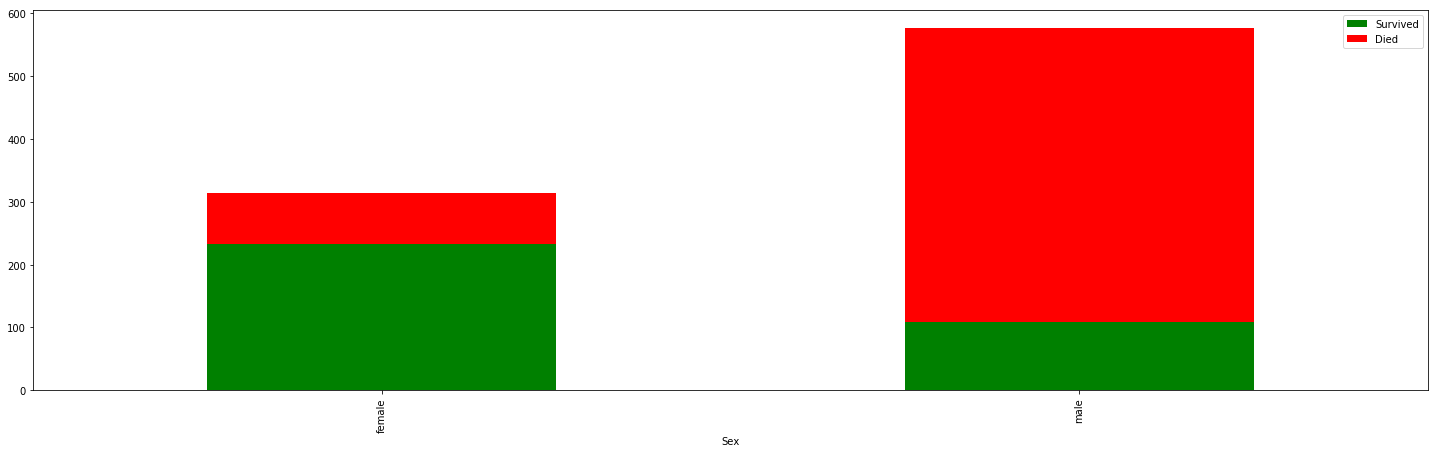

In [9]:
dataset['Died'] = 1 - dataset['Survived']
dataset.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', 
                                                             figsize=(25,7), 
                                                             stacked=True, 
                                                             colors=['g','r']);

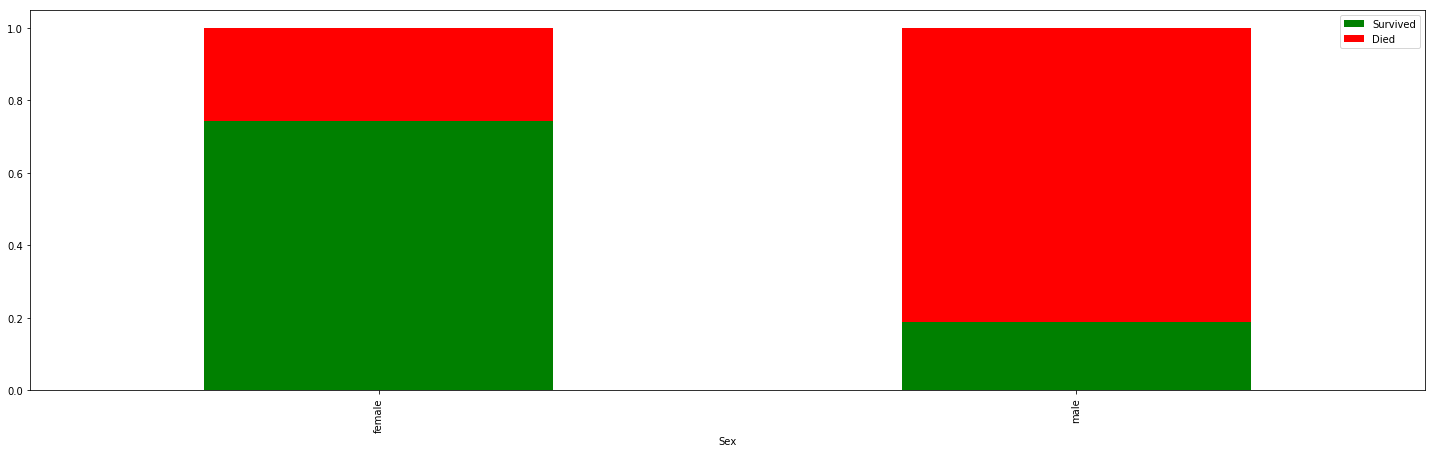

In [10]:
dataset.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', 
                                                              figsize=(25,7),
                                                              stacked=True, 
                                                              colors=['g','r']);

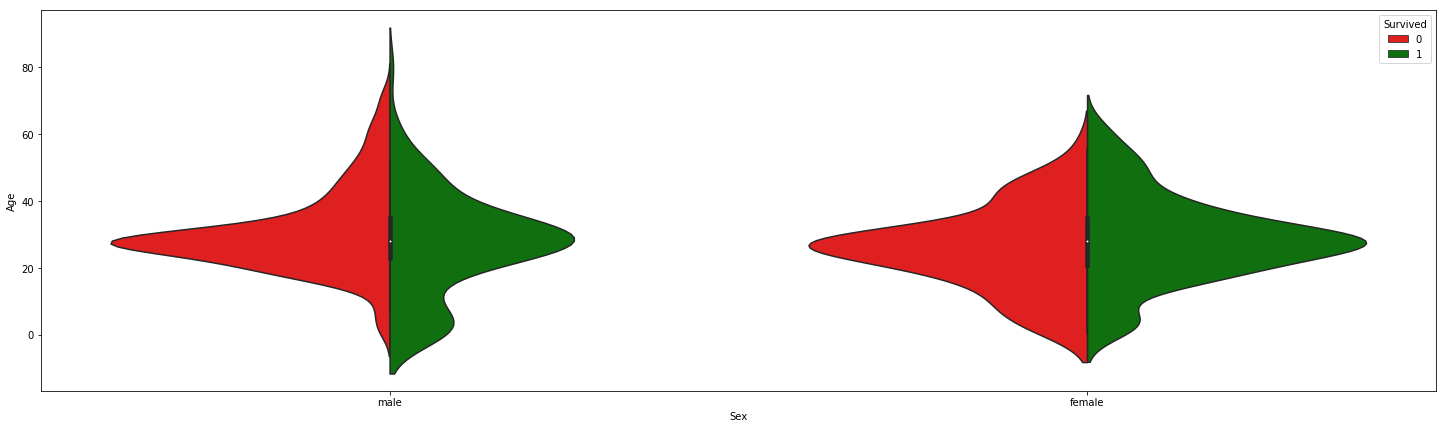

In [11]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex', y='Age',
              hue='Survived', data=dataset,
              split=True,
              palette={0:'r', 1:'g'});

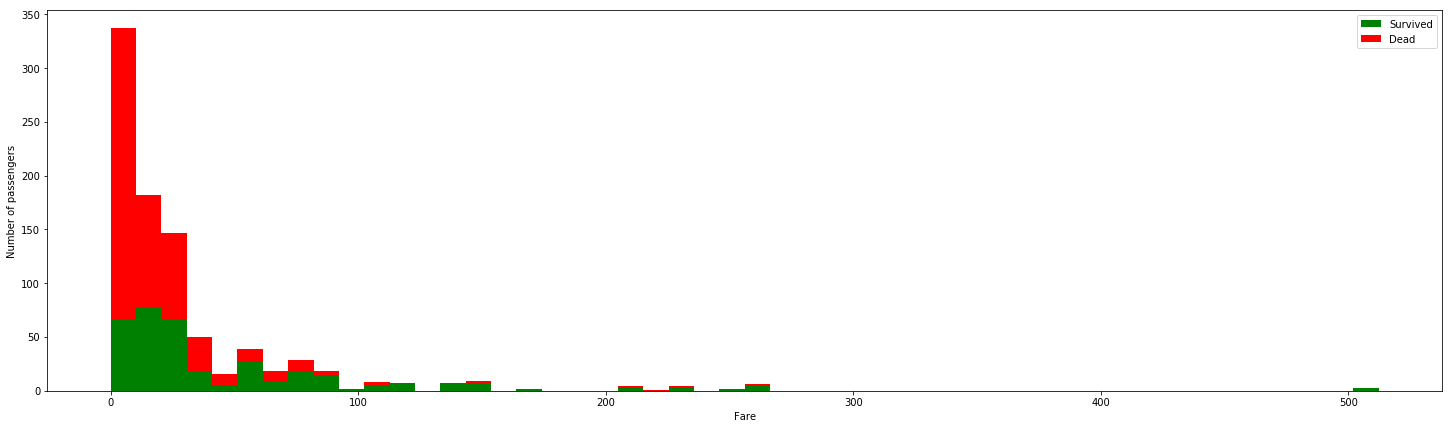

In [12]:
plt.figure(figsize=(25,7))
plt.hist([dataset[dataset['Survived']==1]['Fare'] , 
          dataset[dataset['Survived']==0]['Fare']],
        stacked=True, color=['g','r'],
        bins = 50, label = ['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

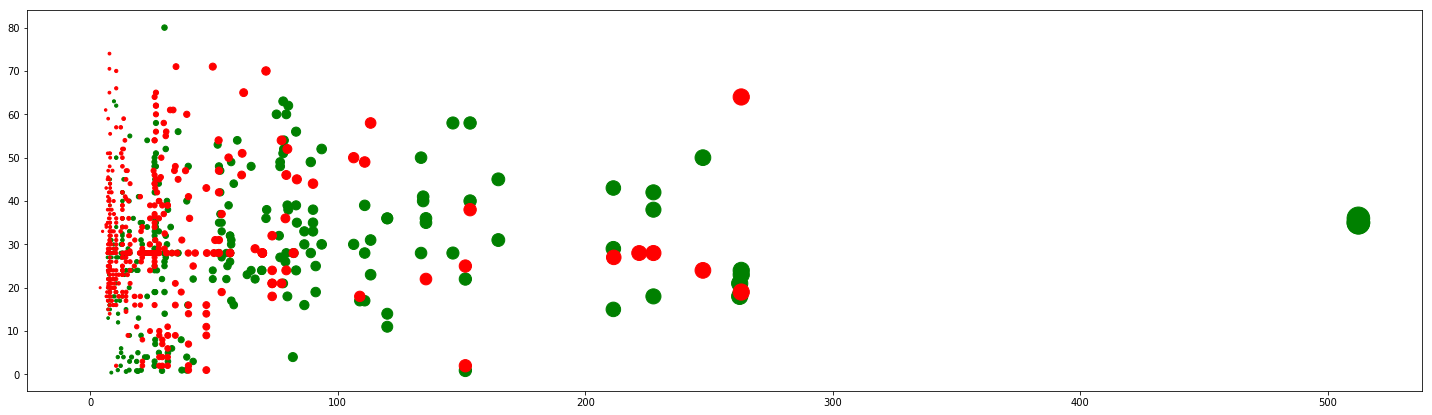

In [13]:
plt.figure(figsize=(25,7))
ax = plt.subplot()
ax.scatter(dataset[dataset['Survived']==1]['Fare'],
           dataset[dataset['Survived']==1]['Age'],
           c='green', s=dataset[dataset['Survived']==1]['Fare'])
ax.scatter(dataset[dataset['Survived']==0]['Fare'],
           dataset[dataset['Survived']==0]['Age'],
           c='red', s=dataset[dataset['Survived']==0]['Fare'])

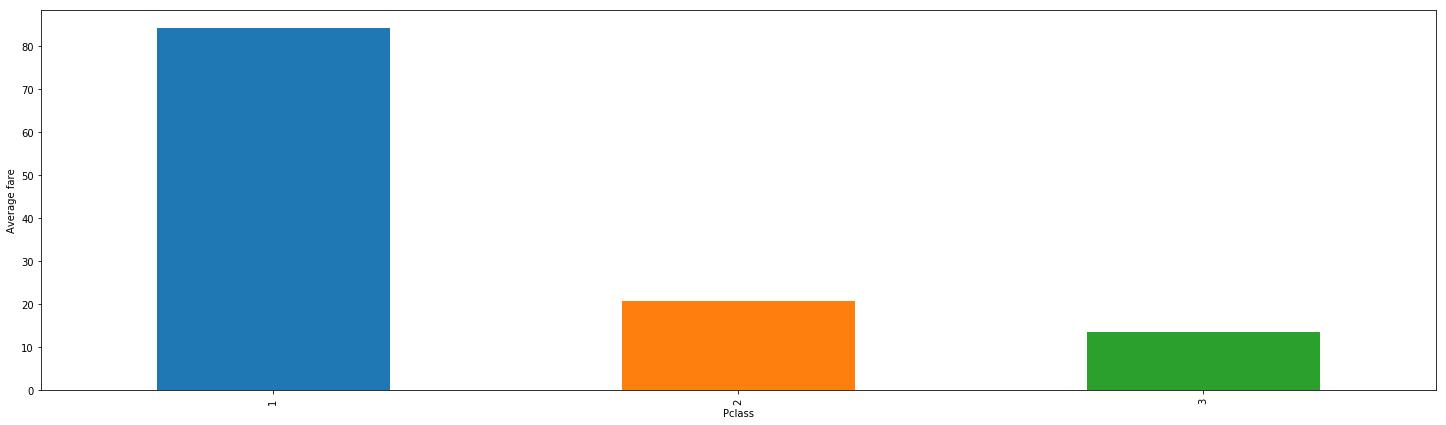

In [14]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
dataset.groupby('Pclass').mean()['Fare'].plot(kind='bar',
                                              figsize=(25,7),
                                              ax=ax);

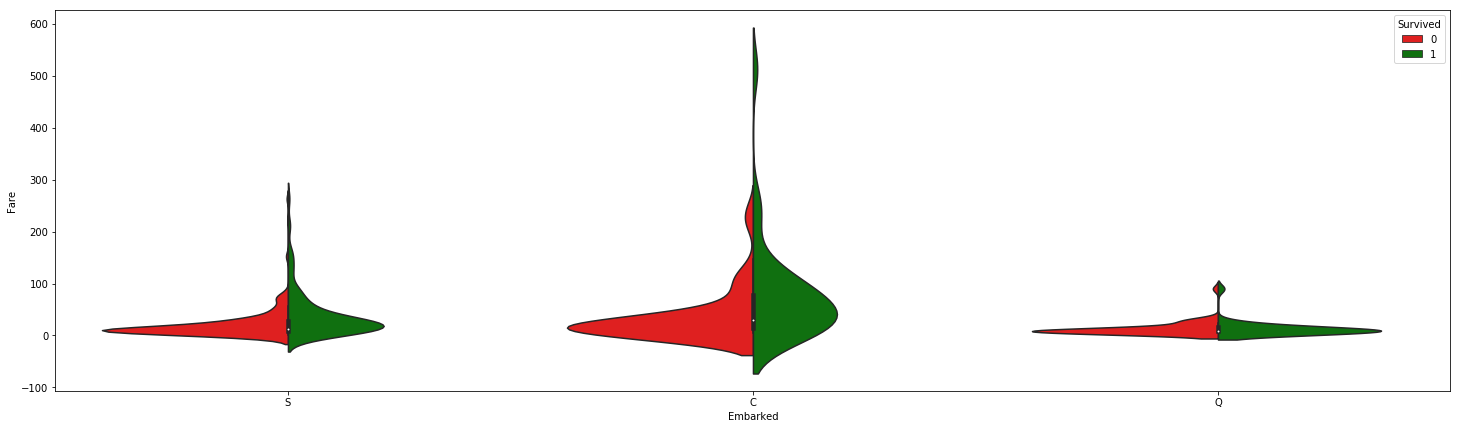

In [15]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=dataset,
              split=True, 
              palette={0:'r', 1:'g'})

Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


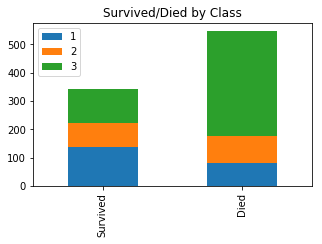

In [16]:
survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")

Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")

# display table
from IPython.display import display
display(df_class)

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,233,109
Died,81,468


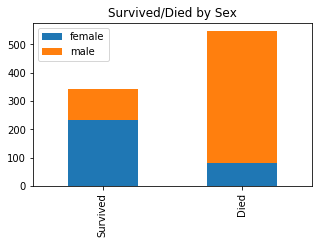

In [17]:
Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")


female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

# display table
from IPython.display import display
display(df_sex) 

Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


,S,C,Q
Survived,217,93,30
Died,427,75,47


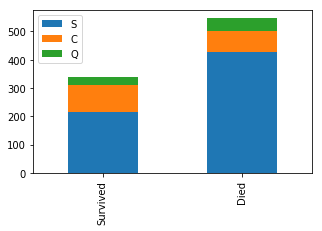

In [18]:
survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked=True, figsize=(5,3))

Embark_S= df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:" ,round(Embark_C), "%")
print("Percentage of Embark Q that survived:" ,round(Embark_Q), "%")

from IPython.display import display
display(df_embark)

In [19]:
X = dataset.drop(['PassengerId','Cabin', 'Ticket', 'Fare', 'Parch', 'SibSp'],
                axis=1)
y = X.Survived
X = X.drop(['Survived'], axis=1)
X.head(10)

,Pclass,Name,Sex,Age,Embarked,Died
0,3,"Braund, Mr. Owen Harris",male,22.0,S,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,0
2,3,"Heikkinen, Miss. Laina",female,26.0,S,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,0
4,3,"Allen, Mr. William Henry",male,35.0,S,1
5,3,"Moran, Mr. James",male,28.0,Q,1
6,1,"McCarthy, Mr. Timothy J",male,54.0,S,1
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S,1
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S,0
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C,0


In [20]:
# ----------------- Encoding categorical data -------------------------

# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)


# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)

X.head(6)

Number of null values in Embarked: 2


,Pclass,Name,Sex,Age,Died,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,1,0,0
5,3,"Moran, Mr. James",1,28.0,1,0,1
